In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [28]:
data = pd.read_csv('change2017_full-extract_clean_github.csv', parse_dates=[0], encoding='utf-8')

In [29]:
data.shape

(43083, 24)

## Création de colonnes plus facilement manipulables :

DataFrame de correspondance : 

In [30]:
ref_col = []
i = 1
for col in data.columns:
    ref_col.append({'question' : 'question_'+str(i),
                    'libelle' : col.encode('utf-8')})
    i=i+1

In [31]:
ref_col[0:4]

[{'libelle': 'Quelle est la cause qui vous tient le plus \xc3\xa0 coeur : ',
  'question': 'question_1'},
 {'libelle': 'Quelle est la cause qui selon vous est la plus trait\xc3\xa9e par les m\xc3\xa9dias mais la moins importante ?',
  'question': 'question_2'},
 {'libelle': 'Quelle est la cause qui selon vous est le plus trait\xc3\xa9e par les politiques mais la moins importante ?',
  'question': 'question_3'},
 {'libelle': 'Si vous deviez juger un candidat sur les solutions qu\xe2\x80\x99il propose sur une seule cause, quelle serait-elle ?',
  'question': 'question_4'}]

In [32]:
df_ref_col = pd.DataFrame(ref_col)
df_ref_col.head()

,libelle,question
0,Quelle est la cause qui vous tient le plus à c...,question_1
1,Quelle est la cause qui selon vous est la plus...,question_2
2,Quelle est la cause qui selon vous est le plus...,question_3
3,Si vous deviez juger un candidat sur les solut...,question_4
4,Pensez-vous qu'un sujet mériterait plus de pla...,question_5


Ajout des nouveaux noms de colonnes dans notre DataFrame ```data```

In [33]:
my_col = []
for i in range(1, len(data.columns)+1):
    my_col.append("question_"+str(i))
    print str(i) +" : " + "(resp. possible "+ str(len(data[data.columns[i-1]].unique()))+") " +data.columns[i-1]

1 : (resp. possible 21) Quelle est la cause qui vous tient le plus à coeur : 
2 : (resp. possible 21) Quelle est la cause qui selon vous est la plus traitée par les médias mais la moins importante ?
3 : (resp. possible 21) Quelle est la cause qui selon vous est le plus traitée par les politiques mais la moins importante ?
4 : (resp. possible 21) Si vous deviez juger un candidat sur les solutions qu’il propose sur une seule cause, quelle serait-elle ?
5 : (resp. possible 21) Pensez-vous qu'un sujet mériterait plus de place dans les médias et dans les programmes politiques ?
6 : (resp. possible 5) Pensez-vous que les programmes politiques des candidats ou partis politiques : [correspondent aux attentes des Français ?]
7 : (resp. possible 5) Pensez-vous que les programmes politiques des candidats ou partis politiques : [permettraient d’améliorer la vie des Français ?]
8 : (resp. possible 3) Selon vous, un candidat à l’élection présidentielle devrait :
9 : (resp. possible 3) Préférez-vous 

In [34]:
# add new column name
data.columns = my_col

In [35]:
# To do some numerical operation
data['nb'] = 1

In [36]:
data.head(2)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_16,question_17,question_18,question_19,question_20,question_21,question_22,question_23,question_24,nb
0,Le vivre ensemble,"La sécurité, le terrorisme","La sécurité, le terrorisme",La protection de l'environnement,Les droits des femmes,Oui plutôt,Oui plutôt,Consulter les citoyens pour construire son pro...,un candidat nouveau dans le monde politique,oui,...,Oui tout à fait,Non pas vraiment,36-40,Cadres et professions intellectuelles supérieures,Un homme,Je préfère ne pas répondre,35 Ille-et-Vilaine,2000 à 20 000 habitants,Écologiste,1
1,La défense des droits humains,L’économie,"La sécurité, le terrorisme",La défense des droits humains,La justice sociale,Non pas complètement,Oui complètement,Consulter les citoyens pour construire son pro...,un candidat qui a déjà une longue carrière pol...,non,...,Oui tout à fait,Non pas vraiment,66-70,Autre,Un homme,de 9 700 à 26 791 euros,77 Seine-et-Marne,Moins de 2000 habitants,Extrême gauche,1


## Fonctions 

In [37]:
def get_question(col):
    """
    Find real libelle question
    ex : get_question('question_8')
    """
    libelle = df_ref_col[df_ref_col['question'] == col]['libelle'].values[0]
    
    return libelle

In [38]:
get_question('question_8')

'Selon vous, un candidat \xc3\xa0 l\xe2\x80\x99\xc3\xa9lection pr\xc3\xa9sidentielle devrait :'

In [39]:
def count_percent_graph(data, col, top=None, sorting=False):
    """
    count_percent_graph(data.copy(), 'question_2', top=8)
    """
    nb_total = data['nb'].sum()
    grp_mean = data.groupby(col, as_index=False)['nb'].sum()
    grp_mean['ratio'] = (grp_mean.nb / nb_total) * 100.0
    grp_mean['ratio'] =grp_mean['ratio'].apply(lambda x: round(x, 2))
    if sorting == True:
        grp_mean.sort_values('ratio', inplace=True)
    
    title = get_question(col)
    
    if top != None:
        grp_mean = grp_mean.tail(top)
        title = title + " (top " + str(top) + ")"
    
    
    plt.figure(figsize=(15,5)) 
    graph = sns.barplot(x=col, y='ratio', data=grp_mean)
    # Si trop de colonnne, on fait des rotations
    if len(grp_mean) > 6:
        list_col = grp_mean[col].unique()
        graph.set_xticklabels(list_col, rotation=20) 
    plt.title(title.decode('utf-8'))
    plt.xlabel('')
    plt.ylabel('Pourcentage des réponse (%)'.decode('utf-8'))

In [40]:
def count_percent_multiple(data, col1, col2,col_wrap=3, hue=None):
    """
    col1 = Question général
    col2 = Sous-question
    ex : count_percent_multiple(data.copy(), "question_20", "question_22", col_wrap=4)
    or with hue : count_percent_multiple(data.copy(), "question_19", "question_22", col_wrap=2, hue='question_20')
    """
    
    nb_total = data['nb'].sum()
    if hue==None:
    
        group = data.groupby([col1, col2])['nb'].sum().reset_index()
        group['ratio'] = (group.nb / nb_total) * 100.0
        group['ratio'] =group['ratio'].apply(lambda x: round(x, 2))
        #group['ratio'] = group.groupby(col1)['nb'].transform(lambda x: (x - x.mean()) / x.std())
    
    
        graph = sns.factorplot(x=col2, y="ratio",col=col1, kind='bar',data=group,
                   col_wrap=col_wrap, order=sorted(group[col2].unique()))
        
    else :
        
        group = data.groupby([col1, col2, hue])['nb'].sum().reset_index()
        group['ratio'] = (group.nb / nb_total) * 100.0
        group['ratio'] = group['ratio'].apply(lambda x: round(x, 2))
        group[hue] = group[hue].apply(lambda x: x.encode('unicode-escape')) #ascci error in legend
        
        # To sort hue_order
        hue_order = group[hue].unique()
        hue_order.sort()
        
        graph = sns.factorplot(x=col2, y="ratio",col=col1, kind='bar',data=group,
               col_wrap=col_wrap, order=sorted(group[col2].unique()), hue=hue, hue_order=hue_order)
        
        # Hack legend ascii
        #legend_hue = []
        #for solo_hue in group[hue].unique():
        #    legend_hue.append(solo_hue.decode('utf-8'))
        #graph.add_legend(legend_data=legend_hue)
        
    graph.set_xticklabels(group[col2].unique(), rotation=45) 
    graph.set_ylabels('Pourcentage des réponse (%)'.decode('utf-8'))
    
    #Title
    plt.subplots_adjust(top=0.85)
    title = get_question(col1)
    title2 = get_question(col2)
    full_title = "[colonnes] "+ title + " \n" + "[lignes] " +title2
    sns.plt.suptitle(full_title.decode('utf-8'), fontsize=19,color="r")
    return group
    

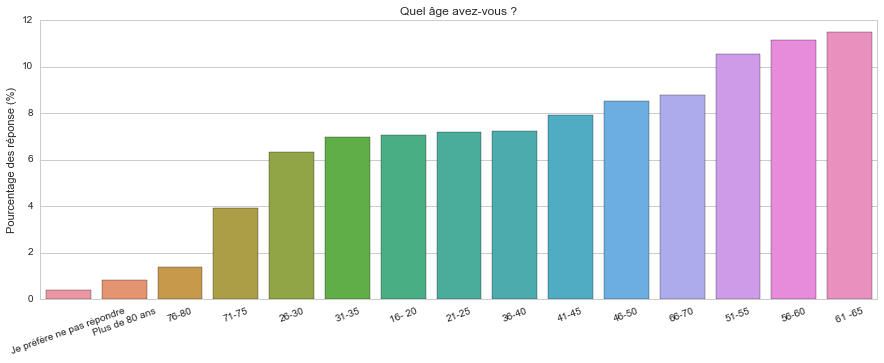

In [41]:
count_percent_graph(data.copy(), 'question_18', sorting=True)

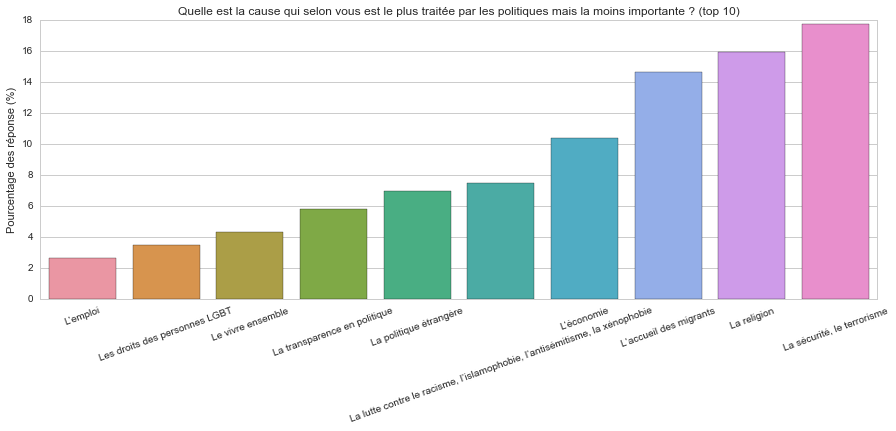

In [43]:
count_percent_graph(data.copy(), 'question_3', top=10, sorting=True)

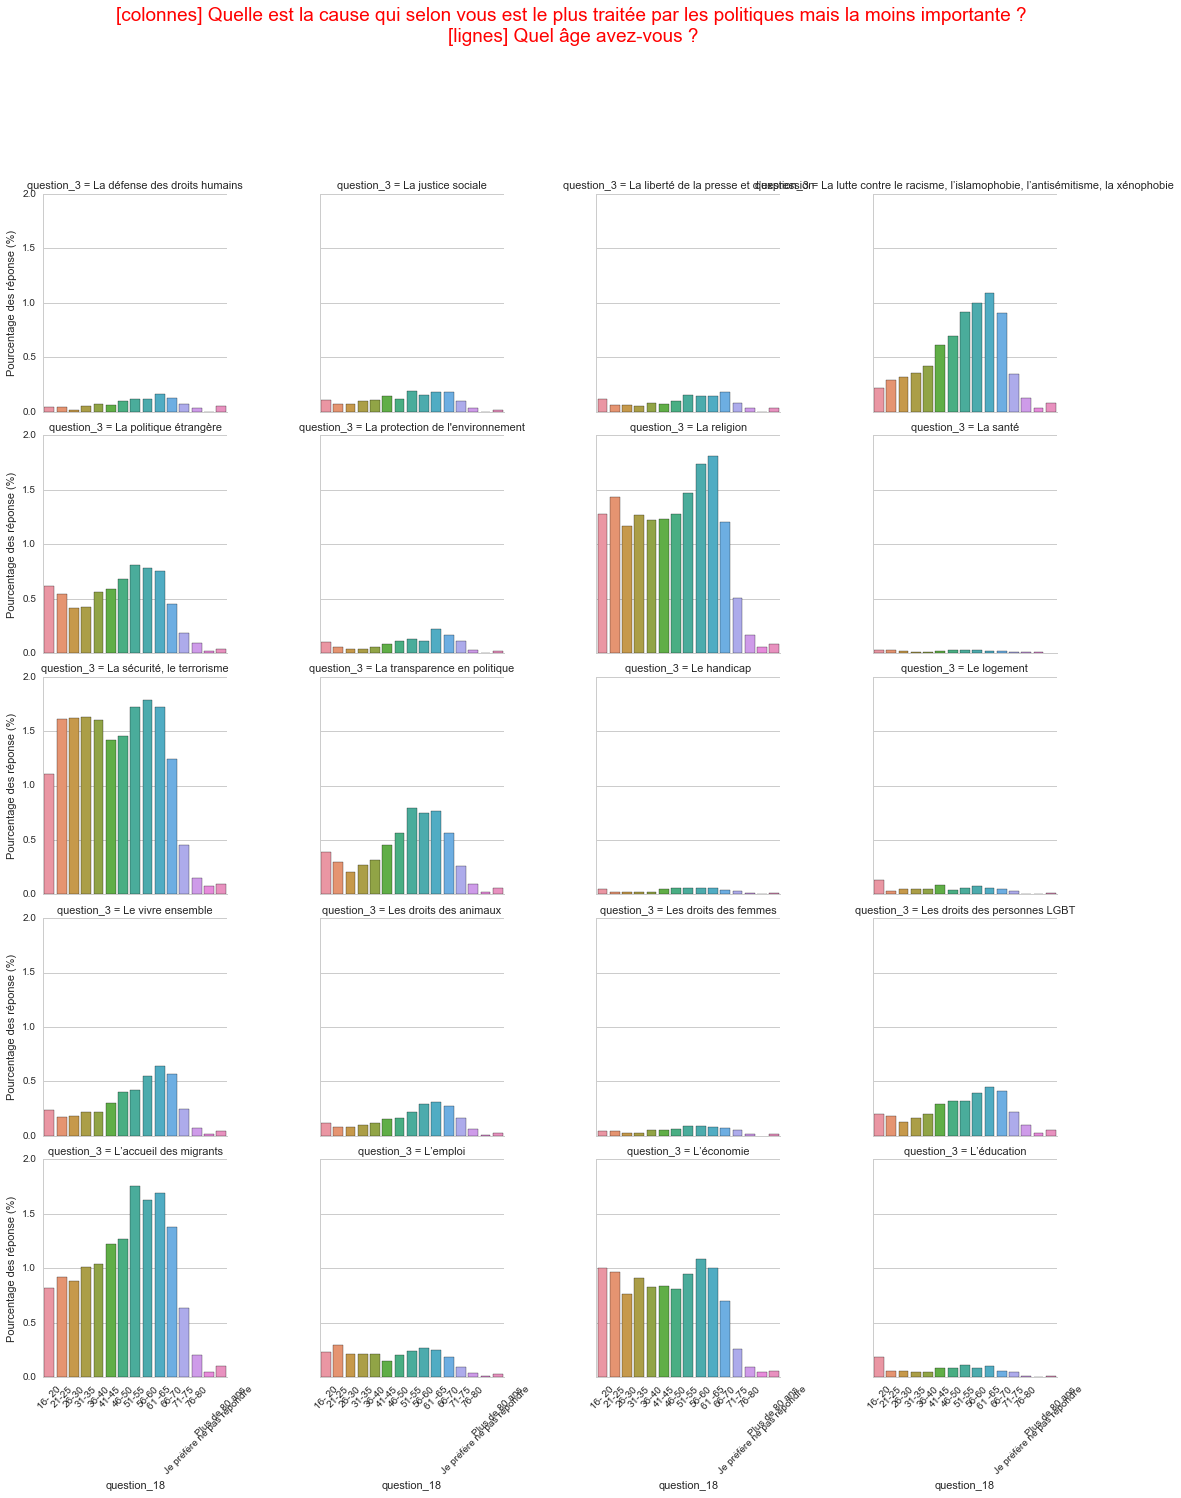

In [21]:
grp = count_percent_multiple(data.copy(), "question_3", "question_18", col_wrap=4)